In [17]:
!pip install datetime

  Using cached DateTime-4.3-py2.py3-none-any.whl (60 kB)


In [1]:
#Importamos la librería necesaria así como el método de SentimentIntensityAnalyzer para hacer el análisis sentimental de 3 textos diferentes
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

x = "It is a charming and beautiful product"
y = "It was a horrible experience!"
z = "I have nothing to say. Normal so far"

sid = SentimentIntensityAnalyzer()
resultadox = sid.polarity_scores(x)
resultadoy = sid.polarity_scores(y)
resultadoz = sid.polarity_scores(z)

print('Resultados del análisis sentimental')
print(resultadox)
print(resultadoy)
print(resultadoz)

[nltk_data] Downloading package vader_lexicon to C:\Users\Daniel
[nltk_data]     Andres\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Resultados del análisis sentimental
{'neg': 0.0, 'neu': 0.342, 'pos': 0.658, 'compound': 0.8271}
{'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5848}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [35]:
########### IMPORTAR LIBRERÍAS #############
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import date, datetime, timedelta, time
import pysrt
from textblob import TextBlob

In [36]:
#Configuramos las gráficas
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0) #16inX9in(LargoxAncho)
style.use('fivethirtyeight') #Estilo de grafico

In [41]:
######### IMPORTAR LOS DATOS #################
# El Encoding es la codificación de caracteres y es un método que permite convertir 
# un carácter de un lenguaje natural en un símbolo de otro sistema de representación, 
# para esto se tienen distintos números. Para nuestro caso debemos utilizar iso-8859-1, 
# en caso de que no coloquemos el encoding seguramente dará un error al momento de ejecutar la línea. 
movie = 'Harry Potter And The Sorcerers Stone1_1.srt'
subs = pysrt.open(movie, encoding='iso-8859-1')

In [42]:
#Intervalo de análisis
#Inicio
start = time(0, 0, 0)
print(start)

#Final
end = subs[-1].end.to_time()
print(end)

#Intervalo
delta = timedelta(minutes=1)
print(delta)

#Definir los intervalos de tiempo
intervals = []
now = start

while now <= end:
    now = (datetime.combine(date.today(), now) + delta).time()
    intervals.append(now)
print(intervals)

sentiments = []
index = 0
n = len(subs)
m = len(intervals)
#Iteración anidada para ir guardando los subtítulos en cada intervalo de la lista
for i in range(m):
    text = ""
    for j in range(index, n):
        #Encuentra todos los subtítulos en cada intervalo
        if subs[j].end.to_time() < intervals[i]:
            text += subs[j].text_without_tags + " "
        else:
            break
    #Realiza el análisis sentimental
    #Cada vez que la variable tenga su valor guardado, antes de reiniciarse
    #se analiza su sentimiento y se agrega a la variable pol, la cual va 
    #siendo añadida la lista sentiments
    blob = TextBlob(text)
    pol = blob.sentiment.polarity
    sentiments.append(pol)
    index = j
    
print(sentiments)

00:00:00
02:23:24.364000
0:01:00
[datetime.time(0, 1), datetime.time(0, 2), datetime.time(0, 3), datetime.time(0, 4), datetime.time(0, 5), datetime.time(0, 6), datetime.time(0, 7), datetime.time(0, 8), datetime.time(0, 9), datetime.time(0, 10), datetime.time(0, 11), datetime.time(0, 12), datetime.time(0, 13), datetime.time(0, 14), datetime.time(0, 15), datetime.time(0, 16), datetime.time(0, 17), datetime.time(0, 18), datetime.time(0, 19), datetime.time(0, 20), datetime.time(0, 21), datetime.time(0, 22), datetime.time(0, 23), datetime.time(0, 24), datetime.time(0, 25), datetime.time(0, 26), datetime.time(0, 27), datetime.time(0, 28), datetime.time(0, 29), datetime.time(0, 30), datetime.time(0, 31), datetime.time(0, 32), datetime.time(0, 33), datetime.time(0, 34), datetime.time(0, 35), datetime.time(0, 36), datetime.time(0, 37), datetime.time(0, 38), datetime.time(0, 39), datetime.time(0, 40), datetime.time(0, 41), datetime.time(0, 42), datetime.time(0, 43), datetime.time(0, 44), datetim

Promedio Análisis Sentimental:  0.013382869926494088


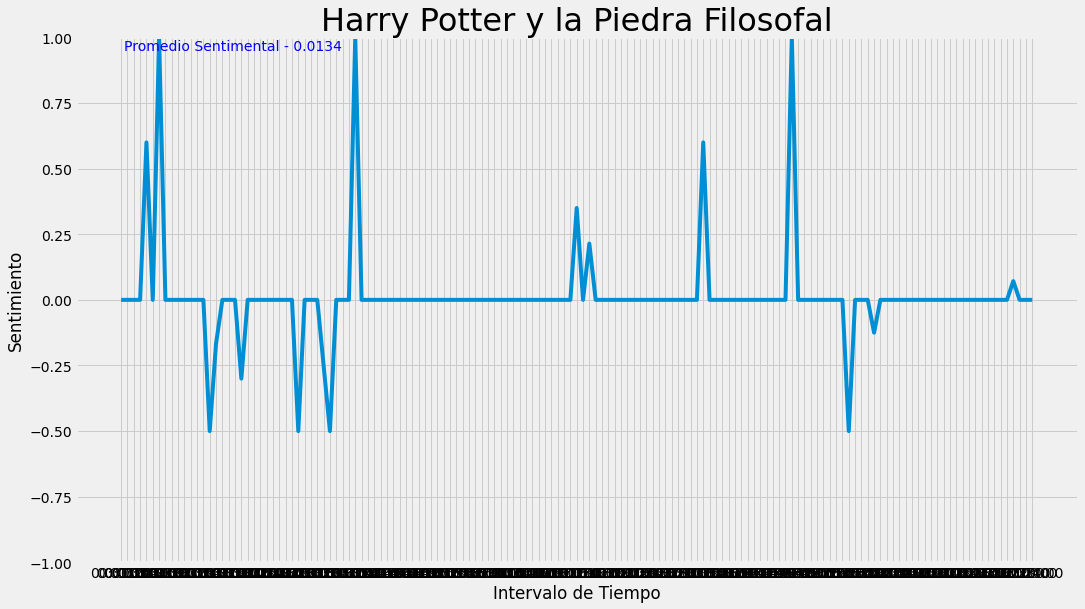

In [48]:
avg = float(sum(sentiments))/len(sentiments)
print("Promedio Análisis Sentimental: ", avg)

#Inicializando las variables
intervals.insert(0, time(0,0,0))
sentiments.insert(0, 0.0)

#Se grafican los resultados
x = intervals
y = sentiments

x = list(map(str, x))

fig, ax = plt.subplots()
plt.plot(x, y)
plt.title("Harry Potter y la Piedra Filosofal", fontsize=32)
plt.ylim((-1, 1))
plt.ylabel("Sentimiento")
plt.xlabel("Intervalo de Tiempo")
plt.text(.5, 0.95, "Promedio Sentimental - " + str(round(avg, 4)), color="blue")
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.show()